# Kernel Optimisation

In this notebook, we will study several method to get the best kernel for the MMD.

## Import modules

In [1]:
import os
os.chdir('..')
import Anomaly

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
from seaborn import kdeplot
from sklearn.metrics import roc_curve

In [3]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 8)

Populating the interactive namespace from numpy and matplotlib


## Test of estimators

In [10]:
law_p = Anomaly.utils.normal(0,4)
law_q = Anomaly.utils.normal(1,4)
kernel = Anomaly.kernels.Gaussian(1)
MMD = Anomaly.MMD.OMMD
m = 1000
n = 100
alpha = 0.05

In [5]:
threshold = Anomaly.estimators.threshold_MC(kernel, law_p, law_p, m, n, alpha,  size_gen = 1000, finalSampleSize=10000)

Start computing first componant
Start computing second componantchevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé% achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % achevé % ac

In [6]:
1-Anomaly.estimators.puissance_MC(MMD, kernel, law_p, law_p,m, n, threshold**2, repeat=1000)

0.6719999999999999

In [7]:
Anomaly.estimators.puissance_MC(MMD, kernel, law_p, law_q,m,n, threshold, repeat=1000)

0.0

## Courbe ROC

In [8]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(0,2)
kernel = Anomaly.kernels.Gaussian(.1)
m = 1000
n = 100

In [9]:
y = np.zeros(2000)
y[:1000] = 1
scores = np.zeros(2000)
scores[:1000] = Anomaly.estimators.sampleMMD_MC(MMD, kernel, law_p, law_q, m, n)
scores[1000:] = Anomaly.estimators.sampleMMD_MC(MMD, kernel, law_p, law_p, m, n)
fpr, tpr, thresholds = roc_curve(y, scores)

KeyboardInterrupt: 

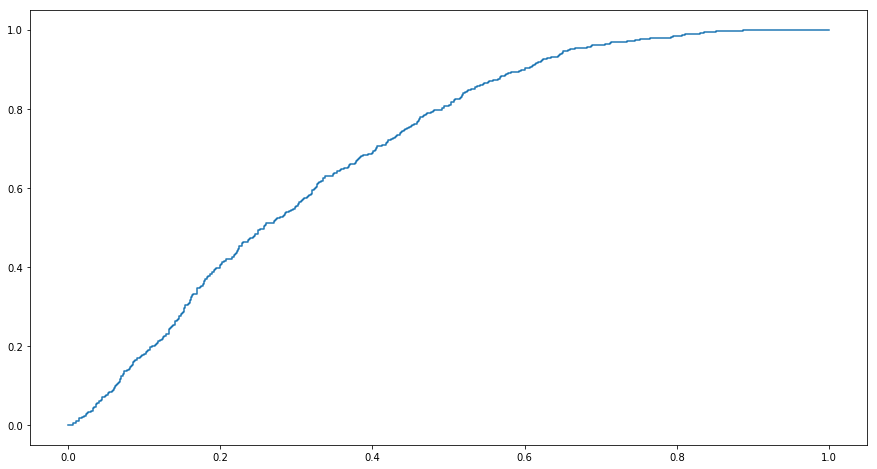

In [10]:
Anomaly.experiments.courbe_ROC([Anomaly.kernels.Gaussian(.1),
                                Anomaly.kernels.Gaussian(1),
                               Anomaly.kernels.Gaussian(10),
                               Anomaly.kernels.Gaussian(.5)], law_p, law_q, m, n, sample_size=100)

## grid Optimisation

In [ ]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(1,1)
Kernel = Anomaly.kernels.Gaussian
m = 1000
n = 100
alpha = 0.05

In [ ]:
parameters = [0.001,0.01,1,10]
L = []
for s in parameters:
    kernel = Kernel(s)
    l = []
    for i in range(10):
        l.append(Anomaly.estimators.score_MC(kernel, law_p, law_q, m, alpha))
    L.append(np.mean(l))
plt.plot(parameters,L)

In [ ]:
L

## Comparaison V1V0

In [ ]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(1,1)
Kernel = Anomaly.kernels.Gaussian

In [ ]:
Anomaly.estimators.var_OMMD_MC(kernel, law_p, law_q, size_gen=1000, finalSampleSize=100)

In [ ]:
law_p = Anomaly.utils.normal(0,0.05)
law_q = Anomaly.utils.normal(0,5000)
Kernel = Anomaly.kernels.Gaussian
Anomaly.estimators.var_OMMD_MC(kernel, law_p, law_q, size_gen=1000, finalSampleSize=100)

In [ ]:
law_p = Anomaly.utils.normal(0,5)
law_q = Anomaly.utils.normal(0,.0005)
Kernel = Anomaly.kernels.Gaussian
Anomaly.estimators.var_OMMD_MC(kernel, law_p, law_q, size_gen=1000, finalSampleSize=100)

## Gaussian kernel and parameter

The Gaussian kernel can be decomposed as a sum of polynomial kernel, we want to compute the coefficient in front of each kernel

In [ ]:
from math import factorial

In [ ]:
f = lambda sigma : lambda k : 1/((sigma)**k*factorial(k))

In [ ]:
L = [f(1)(k) for k in range(10)]

In [ ]:
plt.plot(L)

# Laplacian Kernel

In [ ]:
f = lambda sigma : lambda k : sigma**k/(factorial(k))

In [ ]:
L = [f(2)(k) for k in range(10)]

In [ ]:
plt.plot(L)

In [ ]:
law_p = Anomaly.utils.normal(0,0.00000001)
law_q = Anomaly.utils.normal(0,1)
m = 1000
n = 100

In [ ]:
Anomaly.experiments.courbe_ROC([Anomaly.kernels.laplacian(.1),
                                Anomaly.kernels.laplacian(1),
                               Anomaly.kernels.laplacian(10),
                               Anomaly.kernels.laplacian(.5),
                                Anomaly.kernels.laplacian(2),
                               Anomaly.kernels.laplacian(4)], law_p, law_q, m, n, sample_size=10)

In [ ]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(0.3,1)
m = 1000
n = 100

In [ ]:
Anomaly.experiments.courbe_ROC([Anomaly.kernels.laplacian(.1),
                                Anomaly.kernels.laplacian(1),
                               Anomaly.kernels.laplacian(10),
                               Anomaly.kernels.laplacian(.5),
                                Anomaly.kernels.laplacian(2),
                               Anomaly.kernels.laplacian(4)], law_p, law_q, m, n, sample_size=100)

# Polynomial Kernel

Mean change

In [ ]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(0.5,1)
m = 1000
n = 100

In [ ]:
Anomaly.experiments.courbe_ROC([Anomaly.kernels.polynomial(c=0,d=0),
                                Anomaly.kernels.polynomial(c=0,d=1),
                               Anomaly.kernels.polynomial(c=0,d=2),
                               Anomaly.kernels.polynomial(c=0,d=3),
                                Anomaly.kernels.polynomial(c=0,d=4)], law_p, law_q, m, n, sample_size=10)

Change in variance

In [ ]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(0,2)
m = 1000
n = 100

In [ ]:
Anomaly.experiments.courbe_ROC([Anomaly.kernels.polynomial(c=0,d=0),
                                Anomaly.kernels.polynomial(c=0,d=1),
                               Anomaly.kernels.polynomial(c=0,d=2),
                               Anomaly.kernels.polynomial(c=0,d=3),
                                Anomaly.kernels.polynomial(c=0,d=4)], law_p, law_q, m, n, sample_size=10)

change in first order

In [ ]:
law_p = Anomaly.utils.normal(0,1)
law_q = Anomaly.utils.normal(0.5,np.sqrt(0.75))
m = 1000
n = 100

In [ ]:
Anomaly.experiments.courbe_ROC([Anomaly.kernels.polynomial(c=0,d=0),
                                Anomaly.kernels.polynomial(c=0,d=1),
                               Anomaly.kernels.polynomial(c=0,d=2),
                               Anomaly.kernels.polynomial(c=0,d=3),
                                Anomaly.kernels.polynomial(c=0,d=4)], law_p, law_q, m, n, sample_size=10)